<a href="https://colab.research.google.com/github/lovefamilykien/AI/blob/main/AI_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array

In [5]:
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [6]:
train_data = train.flow_from_directory('/content/drive/MyDrive/AI_final/train', target_size=(120,120), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/AI_final/test', target_size=(120,120), class_mode='categorical')
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

Found 2520 images belonging to 15 classes.
Found 307 images belonging to 15 classes.
train_index : {'Apple_BlackRot': 0, 'Apple_CedarRust': 1, 'Apple_Healthy': 2, 'Apple_Scab': 3, 'Rice_BrownSpot': 4, 'Rice_Healthy': 5, 'Rice_Hispa': 6, 'Rice_LeafBlast': 7, 'Tomato_BacterialSpot': 8, 'Tomato_EarlyBlight': 9, 'Tomato_Healthy': 10, 'Tomato_LateBlight': 11, 'Tomato_LeafMold': 12, 'Tomato_MosaicVirus': 13, 'Tomato_SeptoriaLeafSpot': 14}
test_index: {'Apple_BlackRot': 0, 'Apple_CedarRust': 1, 'Apple_Healthy': 2, 'Apple_Scab': 3, 'Rice_BrownSpot': 4, 'Rice_Healthy': 5, 'Rice_Hispa': 6, 'Rice_LeafBlast': 7, 'Tomato_BacterialSpot': 8, 'Tomato_EarlyBlight': 9, 'Tomato_Healthy': 10, 'Tomato_LateBlight': 11, 'Tomato_LeafMold': 12, 'Tomato_MosaicVirus': 13, 'Tomato_SeptoriaLeafSpot': 14}


In [11]:
model= Sequential()
#CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(120,120,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =15

In [12]:
# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [13]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [15]:
his=model.fit(train_data,epochs=30,batch_size=128,verbose=1,validation_data=test_data)
value=model.evaluate(train_data,verbose=0)
print('loss', value[0])
print('accuracy', value[1])

Epoch 1/30
79/79 [==============================] - 214s 3s/step - loss: 0.1137 - accuracy: 0.9690 - val_loss: 9.3911 - val_accuracy: 0.5179
Epoch 2/30
79/79 [==============================] - 203s 3s/step - loss: 0.0361 - accuracy: 0.9893 - val_loss: 11.0223 - val_accuracy: 0.5081
Epoch 3/30
79/79 [==============================] - 204s 3s/step - loss: 0.0332 - accuracy: 0.9909 - val_loss: 10.5295 - val_accuracy: 0.5049
Epoch 4/30
79/79 [==============================] - 205s 3s/step - loss: 0.0558 - accuracy: 0.9829 - val_loss: 8.7725 - val_accuracy: 0.4821
Epoch 5/30
79/79 [==============================] - 203s 3s/step - loss: 0.0586 - accuracy: 0.9833 - val_loss: 9.6974 - val_accuracy: 0.4919
Epoch 6/30
79/79 [==============================] - 198s 2s/step - loss: 0.0389 - accuracy: 0.9873 - val_loss: 10.1710 - val_accuracy: 0.5179
Epoch 7/30
79/79 [==============================] - 192s 2s/step - loss: 0.0836 - accuracy: 0.9730 - val_loss: 10.0488 - val_accuracy: 0.4723
Epoch 8/3

In [16]:
model.save('/content/drive/MyDrive/Model Save/AI_final.h5')

<ipython-input-17-d88fc4a269da>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='blue')


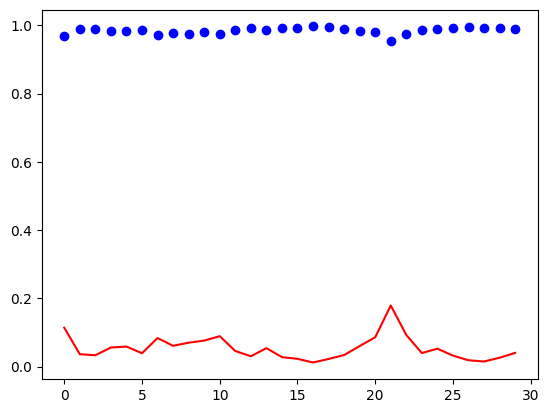

In [17]:
accuracy = his.history['accuracy']
loss = his.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='blue')
plt.plot(epochs,loss , 'r', label ='Training loss')
plt.show()

In [19]:
from keras.models import load_model
# load model save
model_disease_plants= load_model('/content/drive/MyDrive/Model Save/AI_final.h5')

1/1 [==============================] - 0s 41ms/step
Tình trạng cây là: Bị bệnh Mốc sương trên cây Cà chua


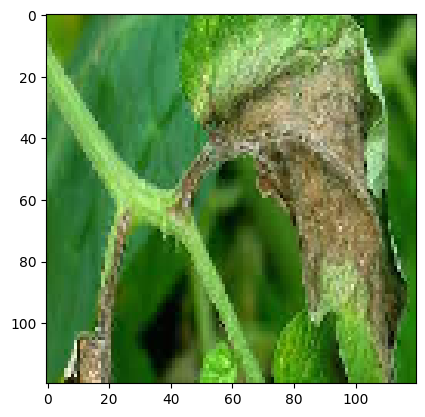

1/1 [==============================] - 0s 34ms/step
Tình trạng cây là: Bị bệnh Thối Đen trên cây Táo


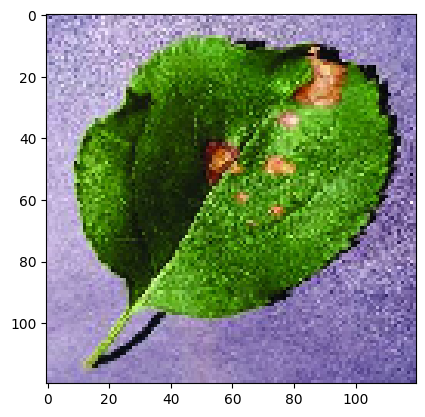

1/1 [==============================] - 0s 33ms/step
Tình trạng cây là: Bị bệnh đốm nâu lá trên cây Lúa


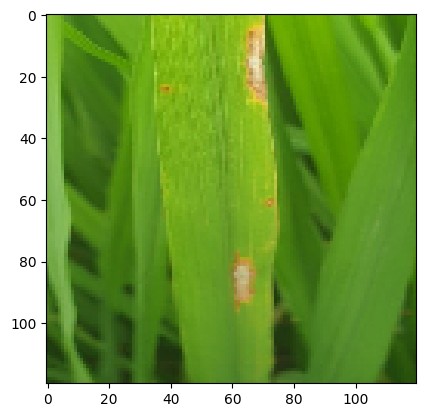

1/1 [==============================] - 0s 54ms/step
Tình trạng cây là: Bị bệnh Rỉ sắt trên cây Táo


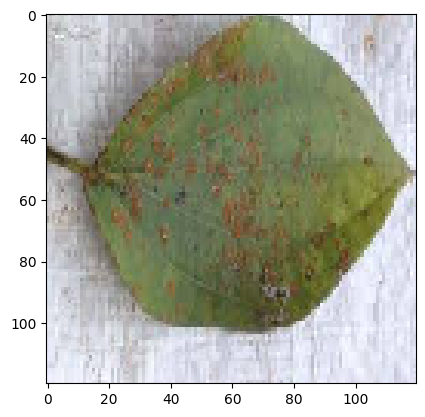

1/1 [==============================] - 0s 53ms/step
Tình trạng cây là: Cây Táo khỏe mạnh


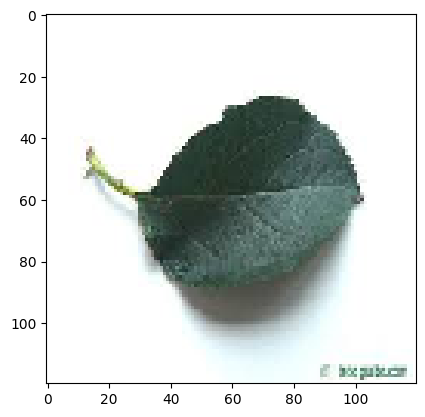

1/1 [==============================] - 0s 53ms/step
Tình trạng cây là: Bị bệnh Đạo ôn trên cây Lúa


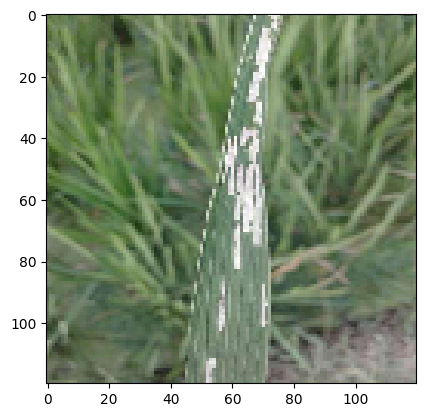

1/1 [==============================] - 0s 57ms/step
Tình trạng cây là: Bị bệnh Đốm do nấm Septoria trên cây Cà chua 


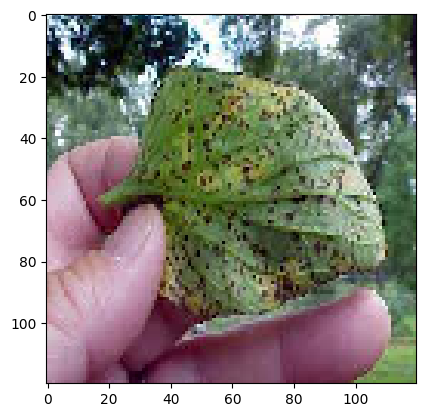

1/1 [==============================] - 0s 52ms/step
Tình trạng cây là: Cây Cà chua khỏe mạnh


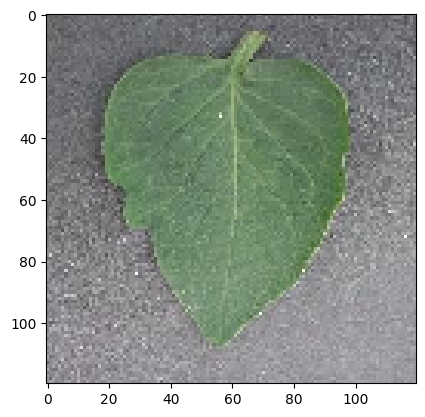

1/1 [==============================] - 0s 85ms/step
Tình trạng cây là: Bị bệnh Đốm vòng trên cây Cà chua


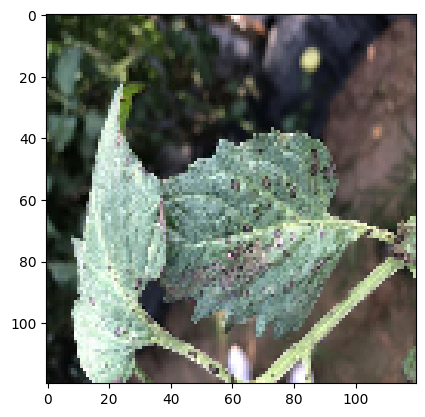

1/1 [==============================] - 0s 51ms/step
Tình trạng cây là: Bị bệnh Đốm vòng trên cây Cà chua


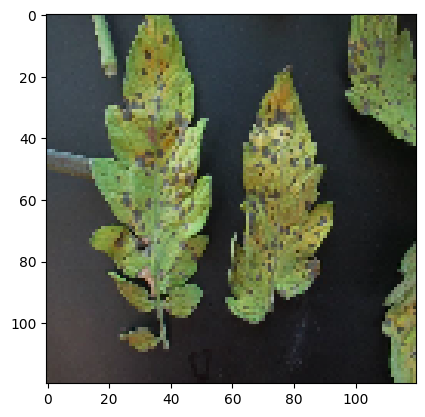

In [47]:
# Đường dẫn thư mục test
test="/content/drive/MyDrive/AI_final/Identify_test"

# Tạo tên hiện các loại bệnh
disease= ['Bị bệnh Thối Đen trên cây Táo',
          'Bị bệnh Rỉ sắt trên cây Táo',
          'Cây Táo khỏe mạnh',
          'Bị bệnh ghẻ Táo',
          'Bị bệnh đốm nâu lá trên cây Lúa',
          'Cây Lúa khỏe mạnh',
          'Bị sâu hại tấn công trên cây Lúa',
          'Bị bệnh Đạo ôn trên cây Lúa',
          'Bị bệnh Đốm lá trên cây Cà chua',
          'Bị bệnh Đốm vòng trên cây Cà chua',
          'Cây Cà chua khỏe mạnh',
          'Bị bệnh Mốc sương trên cây Cà chua',
          'Bị bệnh Mốc lá trên cây Cà chua',
          'Bị bệnh Khảm trên cây Cà chua',
          'Bị bệnh Đốm do nấm Septoria trên cây Cà chua ']

# Quét hết các hình trong đường dẫn và tiến hành dự đoán các loại bệnh
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(120,120), color_mode = 'rgb')
  plt.imshow(img)

  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_disease_plants.predict(img).argmax())

  print("Tình trạng cây là:",disease[result])
  plt.show()